<a href="https://colab.research.google.com/github/YumnaZai/ML-Projects/blob/main/ANN_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Neural Network Model

## Import Data

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/Ionosphere.csv"
df = pd.read_csv(url)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [ ]:
x = df.drop(columns=['Class'], axis=1)  #independent variables
y = df['Class'] # dependent variable
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: Class, Length: 351, dtype: int64


## Split Data to train and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.7.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.2.0.38

#Import Dependencies

In [ ]:
# Import tools to build a neural network
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout

# Build Model

In [ ]:
model= Sequential() #to stack the layers one under the other

# The first hidden layer
model.add(Dense(units=10,activation='relu',input_dim=len(x_train.columns)))
# 10 neurons, relu function, number of input features = input columns

# Second hidden layer
model.add(Dense(units=5,activation='relu'))

# output layer
model.add(Dense(units=1,activation='sigmoid'))
# 1 neuron, sigmoid- (only 0 and 1 as output)

model.summary()
# how many layers, how many parameters, shape of input and output at each step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Binary Calssifcation
model.compile(loss= 'binary_crossentropy', optimizer='sgd', metrics =['accuracy'])
# loss= 'binary_crossentropy' - how to measure error
# optimizer='sgd' - how to adjust itself to reduce the error
# metrics =['accuracy'] - track accuracy

In [ ]:
# Training the model
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=100, batch_size=32)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5286 - loss: 0.6989 - val_accuracy: 0.5915 - val_loss: 0.6990
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6118 - loss: 0.6956 - val_accuracy: 0.6197 - val_loss: 0.6944
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6142 - loss: 0.6910 - val_accuracy: 0.6901 - val_loss: 0.6902
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5981 - loss: 0.6881 - val_accuracy: 0.6761 - val_loss: 0.6860
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5905 - loss: 0.6890 - val_accuracy: 0.6901 - val_loss: 0.6821
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6505 - loss: 0.6811 - val_accuracy: 0.7042 - val_loss: 0.6785
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6451 - loss: 0.6815 - val_accuracy: 0.7042 - val_loss: 0.6751
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6617 - loss: 0.6747 - val_accuracy: 0.7042 - val_loss: 0.6

In [ ]:
y_nn_train_pred = model.predict(x_train)
y_nn_test_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
print(y_nn_train_pred)

[[0.6189082 ]
 [0.77797127]
 [0.5296754 ]
 [0.3809672 ]
 [0.6203964 ]
 [0.6203964 ]
 [0.2968998 ]
 [0.88739073]
 [0.6203964 ]
 [0.6106667 ]
 [0.61422604]
 [0.16417836]
 [0.81296486]
 [0.8959161 ]
 [0.9019089 ]
 [0.89062697]
 [0.44392896]
 [0.41199327]
 [0.7674359 ]
 [0.6203964 ]
 [0.8672771 ]
 [0.3399758 ]
 [0.6203964 ]
 [0.37165323]
 [0.24290073]
 [0.7817664 ]
 [0.6194151 ]
 [0.5306118 ]
 [0.55959105]
 [0.8976952 ]
 [0.6885891 ]
 [0.6203964 ]
 [0.71813357]
 [0.58812606]
 [0.61887383]
 [0.5722529 ]
 [0.8821521 ]
 [0.6203964 ]
 [0.61534715]
 [0.4253537 ]
 [0.844803  ]
 [0.93465996]
 [0.6152613 ]
 [0.58702457]
 [0.5448971 ]
 [0.82375044]
 [0.6102304 ]
 [0.30889755]
 [0.6159804 ]
 [0.6203964 ]
 [0.6203964 ]
 [0.5573701 ]
 [0.61988276]
 [0.9067719 ]
 [0.6077071 ]
 [0.67585653]
 [0.5807954 ]
 [0.91500527]
 [0.5117782 ]
 [0.6203964 ]
 [0.56927943]
 [0.4104165 ]
 [0.6203964 ]
 [0.8876106 ]
 [0.4693711 ]
 [0.34278846]
 [0.61945045]
 [0.34831393]
 [0.08679911]
 [0.6193325 ]
 [0.5572075 ]
 [0.78

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Train
nn_train_mea = mean_squared_error(y_train, y_nn_train_pred) # Calculate mean squared error-
nn_train_r2 = r2_score(y_train, y_nn_train_pred) #calculate the sqqared correlation coeficient

# Test
nn_test_mea = mean_squared_error(y_test, y_nn_test_pred)
nn_test_r2 = r2_score(y_test, y_nn_test_pred)

In [ ]:
print("NN MEA (Train):",nn_train_mea)
print("NN R2 (Train):",nn_train_r2)
print("NN MEA (Test):",nn_test_mea)
print("NN R2 (Test):",nn_test_r2)

NN MEA (Train): 0.1535252332687378
NN R2 (Train): 0.34241819381713867
NN MEA (Test): 0.16516409814357758
NN R2 (Test): 0.22765111923217773


In [ ]:
model.save('weights.h5')

Text(0, 0.5, 'y - axis')

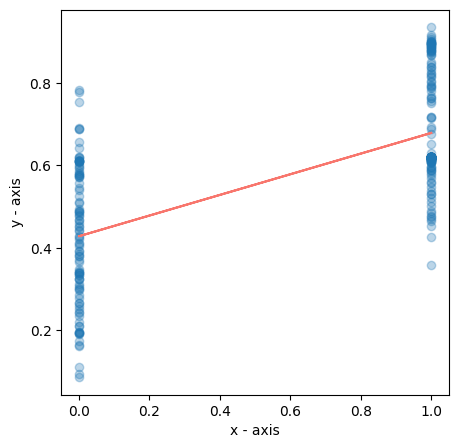

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_nn_train_pred, alpha=0.3)

# The trend line
z = np.polyfit(y_train, y_nn_train_pred.flatten(), 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),"#F8766D")
plt.plot()
plt.xlabel("x - axis")
plt.ylabel("y - axis")